In [9]:
import matplotlib
matplotlib.use('Agg')
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk

np.set_printoptions(precision=6, suppress=True)

In [10]:
window = tk.Tk()

TclError: no display name and no $DISPLAY environment variable

In [2]:
data = pd.read_csv('participants.tsv', sep='\t')

data = data.sample(frac=1).reset_index(drop=True)

# Split data into features and labels
X = data[['MMSE', 'Age']].values
y = data['Group'].values

subject_ids = data['participant_id']

In [3]:
# Convert labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X, y_encoded, subject_ids, test_size=0.2, random_state=42
)

In [4]:
# Create and train the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [5]:
# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 94.44%
              precision    recall  f1-score   support

           A       0.86      1.00      0.92         6
           C       1.00      1.00      1.00         7
           F       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.95      0.93      0.94        18
weighted avg       0.95      0.94      0.94        18



In [6]:
X_Y_data = data[['Age', 'MMSE', 'Group']]
# Define a color map for the labels
color_map = {
    'A': 'red',
    'F': 'blue',
    'C': 'green'
}

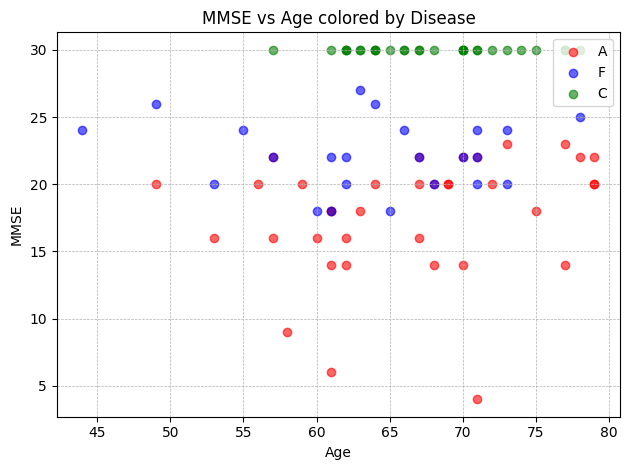

In [7]:
# Plot each group
for label, color in color_map.items():
    subset = X_Y_data[X_Y_data['Group'] == label]
    plt.scatter(subset['Age'], subset['MMSE'], color=color, label=label, alpha=0.6)

plt.title('MMSE vs Age colored by Disease')
plt.xlabel('Age')
plt.ylabel('MMSE')
plt.legend(loc="upper right")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

In [8]:
y_pred = logreg.predict(X_test)

results_df = pd.DataFrame({
    'subject_id': ids_test,
    'true_label': y_test,
    'predicted_label': y_pred
})

In [9]:
# For the test set
test_prob = logreg.predict_proba(X_test)
test_prob = np.array(test_prob)
class_labels = ['Alzheimer\'s Disease', 'Healthy', 'Frontotemporal Dementia']

In [10]:
def plot_probabilities(probabilities, classes):
    """
    Plots the probabilities for a single sample using a bar chart.

    Parameters:
    - probabilities: List or array of predicted probabilities for the sample.
    - classes: List or array of class labels corresponding to the probabilities.
    """
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(classes, probabilities, color='blue', alpha=0.7)
    plt.xlabel('Group')
    plt.ylabel('Probability')
    plt.title('Predicted Probabilities for Each Class')
    plt.ylim(0, 1)  # Probabilities are between 0 and 1
    plt.grid(axis='y')
    plt.tight_layout()

    plt.show()

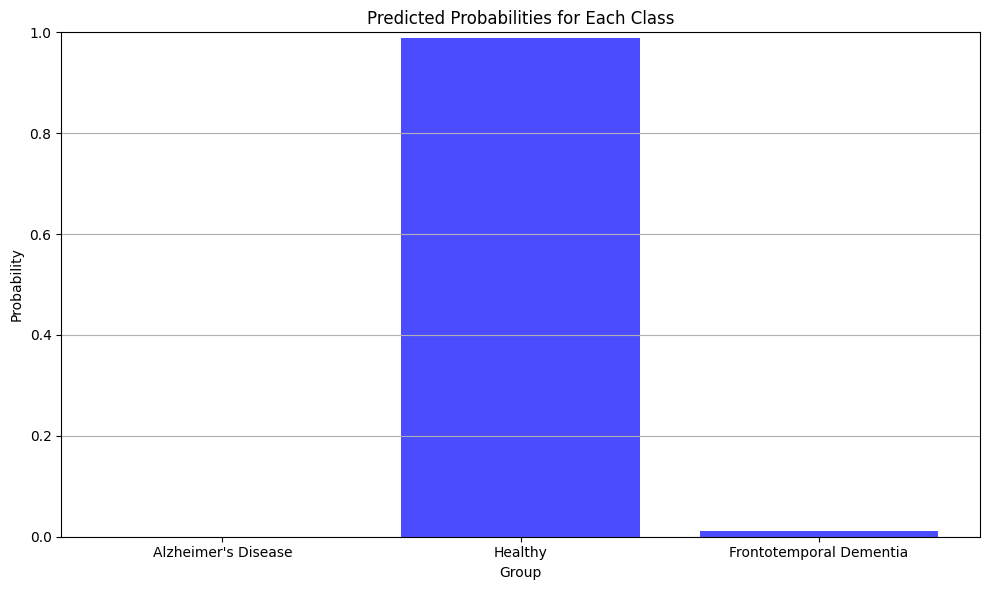

In [11]:
plot_probabilities(test_prob[0], class_labels)